# For the multi-agent examples, please visit multi_agent_example.ipynb

## Reading Input

In [1]:
import pandas as pd
from proj_utils.input_interpreter import format_input

In [2]:
customer_df = pd.read_excel('data/2_detail_table_customers.xls')
deposit_df = pd.read_excel('data/4_detail_table_depots.xls')
routes = customer_df['ROUTE_ID'].unique()

In [3]:
from proj_utils.fake_input_generator import generator
from proj_utils.input_interpreter import format_input

import matplotlib.pyplot as plt

from VRP.greedy_solutions import nearest_neighbour_solution, random_solution
from VRP.modify_solution import combined_rand_modification
from VRP.verify_solution import valid_path, calculate_path_distance, num_vehicles

from proj_utils.path import print_path

from solver_step import SolverStep

# Simulated Annealing Solution

In [4]:
import simulated_annealing.solver as SA # Simulated anealing solver

In [5]:
chosen_route = routes[10]
truck_volume_capacity = 20
truck_weight_capacity = 30000
truck_capacity = (truck_weight_capacity, truck_volume_capacity)
dists, demand, points = format_input(chosen_route,customer_df,deposit_df)
print(len(points))
# dists, demand, points = generator(20)
print(len(demand))

91
91


In [6]:
eval_function = lambda x: 0.3*num_vehicles(x) + calculate_path_distance(x, dists) if(valid_path(x,truck_capacity,demand)) else float('inf')
solver_step = SA.generic_solver_factory(
    lambda x: combined_rand_modification(x, len(points), dists),
    eval_function,
    )

In [7]:
init_state = random_solution(dists, demand, truck_capacity)
init_step = SolverStep(init_state, eval_function(init_state),200)
print(init_state)

[0, 1, 80, 90, 25, 29, 75, 81, 72, 16, 73, 60, 59, 24, 20, 82, 33, 57, 27, 17, 2, 61, 89, 79, 71, 64, 38, 87, 21, 47, 78, 48, 8, 37, 53, 55, 13, 49, 50, 63, 39, 14, 67, 5, 65, 56, 46, 42, 6, 34, 44, 66, 26, 11, 88, 31, 7, 85, 15, 41, 62, 83, 84, 70, 0, 9, 58, 12, 10, 45, 22, 51, 18, 43, 76, 30, 54, 68, 4, 23, 36, 74, 52, 32, 86, 35, 3, 40, 69, 28, 77, 19, 0]


In [8]:
x = []
res = []
c_step = init_step
for i in range(100):
    x.append(i)
    res.append(c_step.get_best_sol_value())
    
    _c_step = solver_step(c_step)
    if(_c_step.get_best_sol_value()< c_step.get_best_sol_value()):
        c_step = _c_step

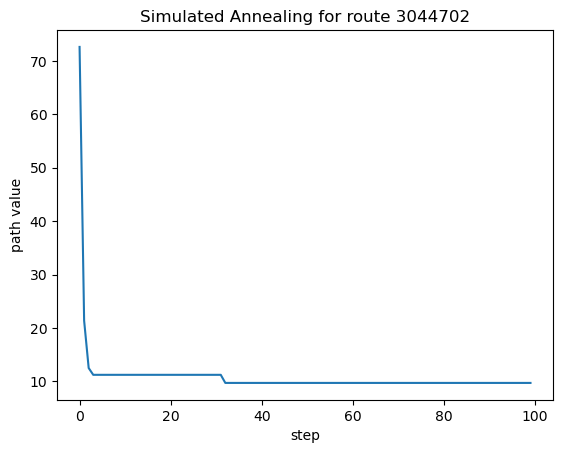

In [9]:
plt.plot(x,res)
plt.xlabel("step")
plt.ylabel("path value")
plt.title(f"Simulated Annealing for route {chosen_route}")
plt.savefig(f'Simulated Annealing for route {chosen_route}.png')

In [10]:
print(res[-1])

9.71204619624202


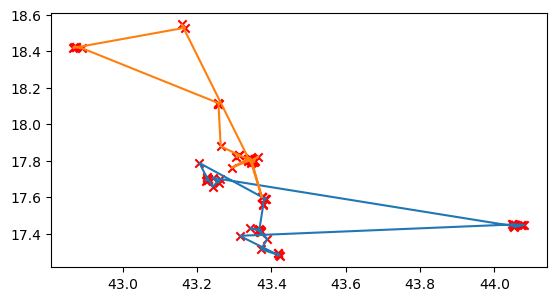

In [11]:
print_path(points, c_step.get_best_sol())

In [12]:
print(c_step.get_best_sol())

[0, 77, 11, 31, 29, 88, 59, 55, 24, 13, 12, 90, 52, 85, 80, 79, 69, 50, 71, 78, 57, 19, 84, 53, 20, 8, 43, 44, 17, 5, 72, 16, 89, 6, 10, 7, 76, 18, 56, 25, 21, 3, 27, 49, 26, 62, 2, 75, 28, 0, 36, 46, 42, 1, 9, 48, 47, 37, 68, 40, 60, 30, 61, 41, 39, 22, 35, 34, 33, 38, 58, 54, 15, 74, 14, 51, 66, 86, 83, 64, 23, 87, 82, 63, 73, 81, 65, 67, 4, 32, 70, 45, 0]


# Taboo Search

In [ ]:
import taboo_search.solver as TS

In [ ]:
chosen_route = routes[10]
truck_volume_capacity = 30
truck_weight_capacity = 20000
truck_capacity = (truck_weight_capacity, truck_volume_capacity)
dists, demand, points = format_input(chosen_route,customer_df,deposit_df)

#dists, demand, points = generator(20)

In [ ]:
eval_function = lambda x: 0.3*num_vehicles(x) + calculate_path_distance(x, dists) if(valid_path(x,truck_capacity,demand)) else float('inf')
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: combined_rand_modification(x, len(points), dists),
    eval_function,
    taboo_list_size
    )

In [ ]:
init_state = random_solution(dists, demand, truck_capacity)
init_step = SolverStep(init_state, eval_function(init_state),200)

In [ ]:
x = []
res = []
c_step = init_step
for i in range(100):
    x.append(i)
    res.append(c_step.get_best_sol_value())
    
    _c_step = solver_step(c_step)
    if(_c_step.get_best_sol_value()< c_step.get_best_sol_value()):
        c_step = _c_step

In [ ]:
plt.plot(x,res)
plt.xlabel("step")
plt.ylabel("path value")
plt.title(f"Taboo Search for route {chosen_route}")
plt.savefig(f'Taboo Search for route {chosen_route}.png')

In [ ]:
print(res[-1])

In [ ]:
print_path(points,c_step.get_best_sol())

# Genetic Algorithm

A detailed usage example is available at genetic_algorithm/ICO_GeneticAlgorithm.ipynb

# Q-learning

In [ ]:
from VRP.greedy_solutions import nearest_neighbour_solution
from VRP.modify_solution import *
from multi_agent.q_learning import *

from proj_utils.fake_input_generator import generator

capacity = (10,4)

dists, demand, points = generator(20)
path = nearest_neighbour_solution(dists, demand, (30,5))

function_list = [
    lambda x: rand_opt_n(x, len(dists)),
    lambda x: remove_smallest_route(x,len(dists),dists),
    lambda x: remove_random_route(x,len(dists),dists),
    lambda x: split_biggest_route(x, len(dists), dists),
    lambda x: split_random_route(x,len(dists), dists),
    #lambda x: rand_reverse_section(x, len(dists))
]

q = q_learning_obj(0,init_q_learning_table(len(function_list)),len(function_list), 0.9, 0.1)
eval_function = lambda x: calculate_path_distance(x, dists) if(valid_path(x,capacity,demand)) else float('inf')

In [ ]:
import taboo_search.solver as TS
taboo_list_size = 10
solver_step = TS.taboo_search_solver_factory(
    lambda x: q_learning_iteration(x,q,function_list,eval_function),
    eval_function,
    taboo_list_size
    )

In [ ]:
from solver_step import SolverStep
init_state = nearest_neighbour_solution(dists, demand, capacity)
init_step = SolverStep(init_state, eval_function(init_state),200)
print(init_state)
step_1 = solver_step(init_step)

print(step_1.get_best_sol())
print_path(points, init_step.get_best_sol())
print_path(points, step_1.get_best_sol())